## HHI Applications in Basketball Measuring Rotational Depth and Scoring Concentration 
---

This paper is authored by Kiran Krishnamurthi, a recent graduate of the University of Southern California with a BS in Finance and an MS in Supply Chain Management and Operations. He will be starting as an Associate Consultant Bain & Company in November. 

### Section 1 - Data Preparation

#### Section 1.1 Data Retrieval from CSV Files

In [1]:
#-- Python Data Modules --#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#-- NBA API Modules --#

from nba_api.stats.endpoints import boxscoretraditionalv2
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams 

import time

In [2]:
#-- Set working directory to access data files --#
import os
os.chdir('/Users/kirankrishnamurthi/Library/Mobile Documents/com~apple~CloudDocs/Data Science/Scoring-Concentration/Team Project Data')

#-- Initiate empty dataframe to store data --#
data = pd.DataFrame()

#-- Create list of NBA teams to iterate through --#
nba_team_list = [
    'Atlanta Hawks'
    , 'Boston Celtics'
    , 'Brooklyn Nets'
    , 'Charlotte Hornets'
    , 'Chicago Bulls'
    , 'Cleveland Cavaliers'
    , 'Dallas Mavericks'
    , 'Denver Nuggets'
    , 'Detroit Pistons'
    , 'Golden State Warriors'
    , 'Houston Rockets'
    , 'Indiana Pacers'
    , 'Los Angeles Clippers'
    , 'Los Angeles Lakers'
    , 'Memphis Grizzlies'
    , 'Miami Heat'
    , 'Milwaukee Bucks'
    , 'Minnesota Timberwolves'
    , 'New Orleans Pelicans'
    , 'New York Knicks'
    , 'Oklahoma City Thunder'
    , 'Orlando Magic'
    , 'Philadelphia 76ers'
    , 'Phoenix Suns'
    , 'Portland Trail Blazers'
    , 'Sacramento Kings'
    , 'San Antonio Spurs'
    , 'Toronto Raptors'
    , 'Utah Jazz'
    , 'Washington Wizards'
]

#-- Iterate through each team and append data to dataframe --#
for t in nba_team_list:
    x = pd.read_csv('{} BXS Data.csv'.format(t), index_col = 0)
    x['TEAM'] = t
    data = pd.concat([data, x], axis = 0)

In [4]:
#-- Output Check --#
data.head(5)

,GAME_ID,TEAM_ID,PLAYER_NAME,TIME,TIMESHARE,PTS_TEAM,PTSSHARE,PTSCAP,PTSCAPSHARE,GAME_DATE,MATCHUP,WL,W_PCT,PTS,HHI_TS,HHI_PS,HHI_PCS,TEAM
0,22101221,1.610613e+09,De'Andre Hunter,32.566667,0.135694,22.0,0.169231,716.466667,0.185135,2022-04-10,ATL @ HOU,W,0.524,130,0.113841,0.157041,0.172386,Atlanta Hawks
1,22101221,1.610613e+09,Danilo Gallinari,31.533333,0.131389,26.0,0.200000,819.866667,0.211854,2022-04-10,ATL @ HOU,W,0.524,130,0.113841,0.157041,0.172386,Atlanta Hawks
2,22101221,1.610613e+09,Clint Capela,23.333333,0.097222,18.0,0.138462,420.000000,0.108528,2022-04-10,ATL @ HOU,W,0.524,130,0.113841,0.157041,0.172386,Atlanta Hawks
3,22101221,1.610613e+09,Kevin Huerter,30.483333,0.127014,11.0,0.084615,335.316667,0.086646,2022-04-10,ATL @ HOU,W,0.524,130,0.113841,0.157041,0.172386,Atlanta Hawks
4,22101221,1.610613e+09,Trae Young,34.233333,0.142639,28.0,0.215385,958.533333,0.247685,2022-04-10,ATL @ HOU,W,0.524,130,0.113841,0.157041,0.172386,Atlanta Hawks


In [5]:
#-- Save combined dataframe to CSV --#
data.to_csv('All Team BXS Data.csv')

#### Section 1.2 Data Manipulation to Calculate Win Percentages

In [6]:
#-- Create a dataframe of teams and their win percentages --#

#-- Initiate empty dataframe and relevant columns --#
team_wins = pd.DataFrame()
team_wins['TEAM'] = pd.Series(nba_team_list)
team_wins['W_PCT'] = None

#--- Iterate through each team and append win percentage to dataframe --#
for t in nba_team_list:
    x = data[data['TEAM'] == t]['W_PCT'].head(1).reset_index()['W_PCT'][0]
    team_wins.loc[team_wins['TEAM'] == t, 'W_PCT'] = x

#-- Convert win percentage to number of games won --#
team_wins['GAMES_WON'] = team_wins['W_PCT'] * 82
team_wins['GAMES_WON'] = team_wins['GAMES_WON'].apply(lambda x: np.round(x, 0))
team_wins['GAMES_LOST'] = 82 - team_wins['GAMES_WON']

#-- Sort dataframe by win percentage --#
team_wins = team_wins.sort_values(by = 'W_PCT', ascending = False).reset_index(drop = True)

#-- Save dataframe to CSV --#
team_wins.to_csv('Team Wins.csv')

#-- Display output --#
team_wins

,TEAM,W_PCT,GAMES_WON,GAMES_LOST
0,Phoenix Suns,0.78,64.0,18.0
1,Memphis Grizzlies,0.683,56.0,26.0
2,Miami Heat,0.646,53.0,29.0
3,Golden State Warriors,0.646,53.0,29.0
4,Dallas Mavericks,0.634,52.0,30.0
5,Boston Celtics,0.622,51.0,31.0
6,Philadelphia 76ers,0.622,51.0,31.0
7,Milwaukee Bucks,0.622,51.0,31.0
8,Utah Jazz,0.598,49.0,33.0
9,Denver Nuggets,0.585,48.0,34.0


#### Section 1.3 Average Values for Index Metrics

In [9]:
### Compute average values for each index for each team ###

#-- Create a working dataframe grouped on teams and games to compute average values --#
wdata = data.groupby(['TEAM', 'GAME_ID'])[['HHI_TS', 'HHI_PS', 'HHI_PCS']].mean().reset_index()

#-- Pivot working data to compute average values for each team --#
wdata2 = wdata.pivot_table(
    index = 'TEAM'
    , values = ['HHI_TS', 'HHI_PS', 'HHI_PCS']
    , aggfunc = np.mean
)

#-- Save dataframe to CSV --#
wdata2.to_csv('All Team HHI Data.csv')

In [10]:
#-- Join aggregate team HHI average dataframe with team wins dataframe --#

wdata2.join(team_wins.set_index("TEAM"))

,HHI_PCS,HHI_PS,HHI_TS,W_PCT,GAMES_WON,GAMES_LOST
TEAM,,,,,,
Atlanta Hawks,0.192608,0.159661,0.115148,0.524,43.0,39.0
Boston Celtics,0.202548,0.168058,0.119210,0.622,51.0,31.0
Brooklyn Nets,0.215031,0.171247,0.116738,0.537,44.0,38.0
Charlotte Hornets,0.184972,0.157689,0.120699,0.524,43.0,39.0
Chicago Bulls,0.209869,0.175640,0.122046,0.561,46.0,36.0
Cleveland Cavaliers,0.179769,0.154717,0.119407,0.537,44.0,38.0
Dallas Mavericks,0.198512,0.162885,0.115246,0.634,52.0,30.0
Denver Nuggets,0.184390,0.151060,0.110836,0.585,48.0,34.0
Detroit Pistons,0.178871,0.148090,0.112147,0.28,23.0,59.0


### Section 2 - Data Exploration

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_47927/1974719898.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


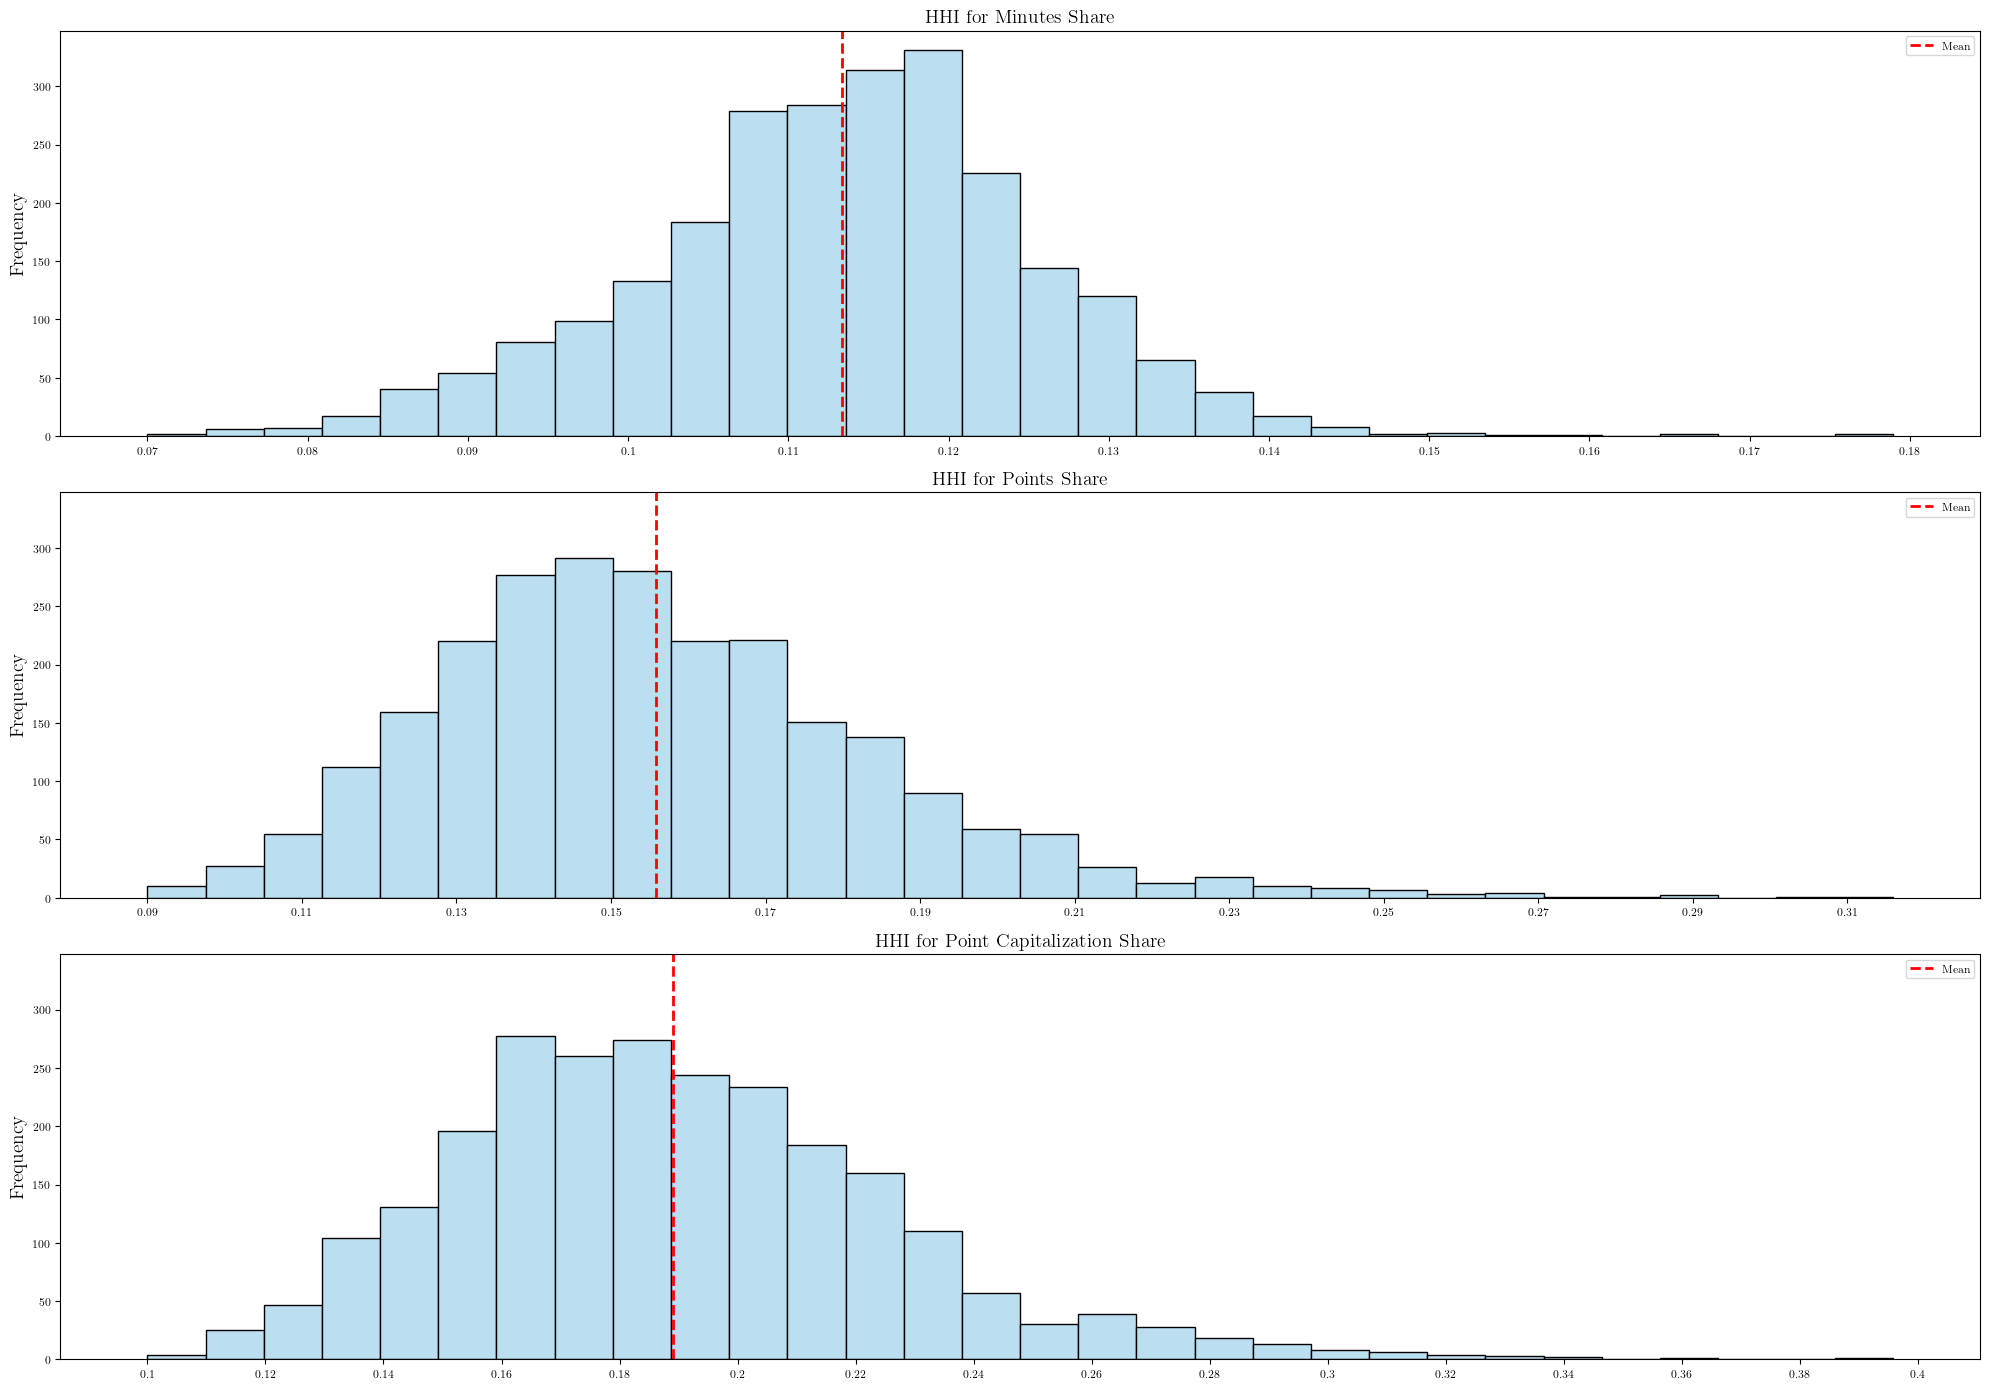

In [128]:
### Plot Histograms for Each HHI ###
import seaborn as sns

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

fig, axs = plt.subplots(3, 1, sharey = True, figsize = (20, 14))

axs[0].hist(wdata['HHI_TS'], bins = 30, ec = 'black', label='_nolegend_', color = '#BBDEF0')
axs[0].axvline(wdata['HHI_TS'].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
axs[0].legend(['Mean'])
axs[0].set_xticks(np.arange(np.min(wdata['HHI_TS']), np.max(wdata['HHI_TS']) + .01, .01))
axs[0].set_xticklabels(np.round(np.arange(np.min(wdata['HHI_TS']), np.max(wdata['HHI_TS']) + .01, .01), 2))
axs[0].set_ylabel('Frequency', fontdict = {'family' : 'serif', 'size' : 14})
axs[0].set_title('HHI for Minutes Share', fontdict = {'family' : 'serif', 'size' : 14})

axs[1].hist(wdata['HHI_PS'], bins = 30, ec = 'black', label='_nolegend_', color = '#BBDEF0')
axs[1].axvline(wdata['HHI_PS'].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
axs[1].legend(['Mean'])

axs[1].set_xticks(np.arange(np.min(wdata['HHI_PS']), np.max(wdata['HHI_PS']) + .01, .02))
axs[1].set_xticklabels(np.round(np.arange(np.min(wdata['HHI_PS']), np.max(wdata['HHI_PS']) + .01, .02), 2))

axs[1].set_ylabel('Frequency', fontdict = {'family' : 'serif', 'size' : 14})
axs[1].set_title('HHI for Points Share', fontdict = {'family' : 'serif', 'size' : 14})


axs[2].hist(wdata['HHI_PCS'], bins = 30, ec = 'black', label='_nolegend_', color = '#BBDEF0')
axs[2].axvline(wdata['HHI_PCS'].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
axs[2].legend(['Mean'])

axs[2].set_xticks(np.arange(np.min(wdata['HHI_PCS']), np.max(wdata['HHI_PCS']) + .01, .02))
axs[2].set_xticklabels(np.round(np.arange(np.min(wdata['HHI_PCS']), np.max(wdata['HHI_PCS']) + .01, .02), 2))

axs[2].set_ylabel('Frequency', fontdict = {'family' : 'serif', 'size' : 14})
axs[2].set_title('HHI for Point Capitalization Share', fontdict = {'family' : 'serif', 'size' : 14})

fig.tight_layout()
fig.savefig('HHI Histograms.eps', format = 'eps', dpi = 1000)
fig.show()



### Section 3 - Metric Connection to Winning

In [14]:
wdata[['HHI_TS', 'HHI_PS', 'HHI_PCS']].aggregate(['mean', 'median', 'std', 'skew', 'kurtosis']).T.to_csv('HHI_Summary_Stats1.csv')

table1 = wdata[['HHI_TS', 'HHI_PS', 'HHI_PCS']].aggregate(['mean', 'median', 'std', 'skew', 'kurtosis']).T

table1

,mean,median,std,skew,kurtosis
HHI_TS,0.115132,0.115787,0.012315,-0.061444,0.896592
HHI_PS,0.156042,0.152949,0.028721,0.868944,1.704187
HHI_PCS,0.187356,0.183816,0.037073,0.731216,1.175221


In [15]:
pd.DataFrame([np.quantile(wdata['HHI_TS'], [0, .25, .5, .75, 1])
                , np.quantile(wdata['HHI_PS'], [0, .25, .5, .75, 1])
                , np.quantile(wdata['HHI_PCS'], [0, .25, .5, .75, 1])]
, index = ['HHI_TS', 'HHI_PS', 'HHI_PCS']
, columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']).to_csv('HHI_Summary_Stats2.csv')

table2 = pd.DataFrame([np.quantile(wdata['HHI_TS'], [0, .25, .5, .75, 1])
                , np.quantile(wdata['HHI_PS'], [0, .25, .5, .75, 1])
                , np.quantile(wdata['HHI_PCS'], [0, .25, .5, .75, 1])]
, index = ['HHI_TS', 'HHI_PS', 'HHI_PCS']
, columns = ['Min', 'Q1', 'Median', 'Q3', 'Max'])

table2

,Min,Q1,Median,Q3,Max
HHI_TS,0.071762,0.107942,0.115787,0.122788,0.180690
HHI_PS,0.090249,0.136488,0.152949,0.171817,0.316144
HHI_PCS,0.098315,0.161860,0.183816,0.208779,0.394045


In [16]:
### Table that Shows HHI Values and Corresponding Normalized Values ###

table3 = wdata2

table3['HHI_TS_NORM'] = (table3['HHI_TS'] - table1.loc['HHI_TS', 'mean']) / table1.loc['HHI_TS', 'std']
table3['HHI_PS_NORM'] = (table3['HHI_PS'] - table1.loc['HHI_PS', 'mean']) / table1.loc['HHI_PS', 'std']
table3['HHI_PCS_NORM'] = (table3['HHI_PCS'] - table1.loc['HHI_PCS', 'mean']) / table1.loc['HHI_PCS', 'std']

table3 = table3[['HHI_TS', 'HHI_TS_NORM', 'HHI_PS', 'HHI_PS_NORM', 'HHI_PCS', 'HHI_PCS_NORM']]

table3.to_csv('HHI_Teams_Normalized.csv')

table3

,HHI_TS,HHI_TS_NORM,HHI_PS,HHI_PS_NORM,HHI_PCS,HHI_PCS_NORM
TEAM,,,,,,
Atlanta Hawks,0.115148,0.001278,0.159661,0.126002,0.192608,0.141678
Boston Celtics,0.119210,0.331097,0.168058,0.418368,0.202548,0.409803
Brooklyn Nets,0.116738,0.130403,0.171247,0.529413,0.215031,0.746504
Charlotte Hornets,0.120699,0.452027,0.157689,0.057356,0.184972,-0.064299
Chicago Bulls,0.122046,0.561356,0.175640,0.682345,0.209869,0.607266
Cleveland Cavaliers,0.119407,0.347063,0.154717,-0.046111,0.179769,-0.204652
Dallas Mavericks,0.115246,0.009202,0.162885,0.238261,0.198512,0.300934
Denver Nuggets,0.110836,-0.348884,0.151060,-0.173436,0.184390,-0.079995
Detroit Pistons,0.112147,-0.242395,0.148090,-0.276861,0.178871,-0.228864


In [17]:
wdata2.sort_values(by = 'HHI_PCS', ascending = False)

,HHI_PCS,HHI_PS,HHI_TS,HHI_TS_NORM,HHI_PS_NORM,HHI_PCS_NORM
TEAM,,,,,,
Brooklyn Nets,0.215031,0.171247,0.116738,0.130403,0.529413,0.746504
Los Angeles Lakers,0.210731,0.170774,0.115290,0.012818,0.512945,0.630522
Chicago Bulls,0.209869,0.175640,0.122046,0.561356,0.682345,0.607266
Philadelphia 76ers,0.204202,0.173620,0.121059,0.481236,0.612021,0.454400
Boston Celtics,0.202548,0.168058,0.119210,0.331097,0.418368,0.409803
Toronto Raptors,0.199707,0.165713,0.126608,0.931790,0.336715,0.333158
Golden State Warriors,0.199160,0.158817,0.108711,-0.521397,0.096630,0.318400
Dallas Mavericks,0.198512,0.162885,0.115246,0.009202,0.238261,0.300934
New York Knicks,0.197142,0.163670,0.118248,0.252981,0.265594,0.263979


In [18]:
wdata3 = wdata2.join(team_wins.set_index('TEAM'), on = 'TEAM', how = 'left').reset_index()
wdata3.to_csv('HHI Data with Winning Percentages.csv')
wdata3

,TEAM,HHI_PCS,HHI_PS,HHI_TS,HHI_TS_NORM,HHI_PS_NORM,HHI_PCS_NORM,W_PCT,GAMES_WON,GAMES_LOST
0,Atlanta Hawks,0.192608,0.159661,0.115148,0.001278,0.126002,0.141678,0.524,43.0,39.0
1,Boston Celtics,0.202548,0.168058,0.119210,0.331097,0.418368,0.409803,0.622,51.0,31.0
2,Brooklyn Nets,0.215031,0.171247,0.116738,0.130403,0.529413,0.746504,0.537,44.0,38.0
3,Charlotte Hornets,0.184972,0.157689,0.120699,0.452027,0.057356,-0.064299,0.524,43.0,39.0
4,Chicago Bulls,0.209869,0.175640,0.122046,0.561356,0.682345,0.607266,0.561,46.0,36.0
5,Cleveland Cavaliers,0.179769,0.154717,0.119407,0.347063,-0.046111,-0.204652,0.537,44.0,38.0
6,Dallas Mavericks,0.198512,0.162885,0.115246,0.009202,0.238261,0.300934,0.634,52.0,30.0
7,Denver Nuggets,0.184390,0.151060,0.110836,-0.348884,-0.173436,-0.079995,0.585,48.0,34.0
8,Detroit Pistons,0.178871,0.148090,0.112147,-0.242395,-0.276861,-0.228864,0.28,23.0,59.0
9,Golden State Warriors,0.199160,0.158817,0.108711,-0.521397,0.096630,0.318400,0.646,53.0,29.0


In [19]:
#-- Correlation between 

wdata3['W_PCT'] = wdata3['W_PCT'].astype(float)

wdata3[['HHI_PCS', 'HHI_PS', 'HHI_TS', 'W_PCT']].corr().to_csv('indices_correlation_wins.csv')

wdata3[['HHI_PCS', 'HHI_PS', 'HHI_TS', 'W_PCT']].corr()

,HHI_PCS,HHI_PS,HHI_TS,W_PCT
HHI_PCS,1.000000,0.951416,0.453617,0.430862
HHI_PS,0.951416,1.000000,0.598960,0.479734
HHI_TS,0.453617,0.598960,1.000000,0.142435
W_PCT,0.430862,0.479734,0.142435,1.000000


In [28]:
wdata3.head()

,TEAM,HHI_PCS,HHI_PS,HHI_TS,HHI_TS_NORM,HHI_PS_NORM,HHI_PCS_NORM,W_PCT,GAMES_WON,GAMES_LOST,W_PCT_RANK
0,Atlanta Hawks,0.192608,0.159661,0.115148,0.001278,0.126002,0.141678,0.524,43.0,39.0,None
1,Boston Celtics,0.202548,0.168058,0.119210,0.331097,0.418368,0.409803,0.622,51.0,31.0,None
2,Brooklyn Nets,0.215031,0.171247,0.116738,0.130403,0.529413,0.746504,0.537,44.0,38.0,None
3,Charlotte Hornets,0.184972,0.157689,0.120699,0.452027,0.057356,-0.064299,0.524,43.0,39.0,None
4,Chicago Bulls,0.209869,0.175640,0.122046,0.561356,0.682345,0.607266,0.561,46.0,36.0,None


In [64]:
#-- Abbreviated Team Names --#
wdata3['TEAM_ABBRV'] = wdata3['TEAM'].apply(lambda x: x.split()[-1])

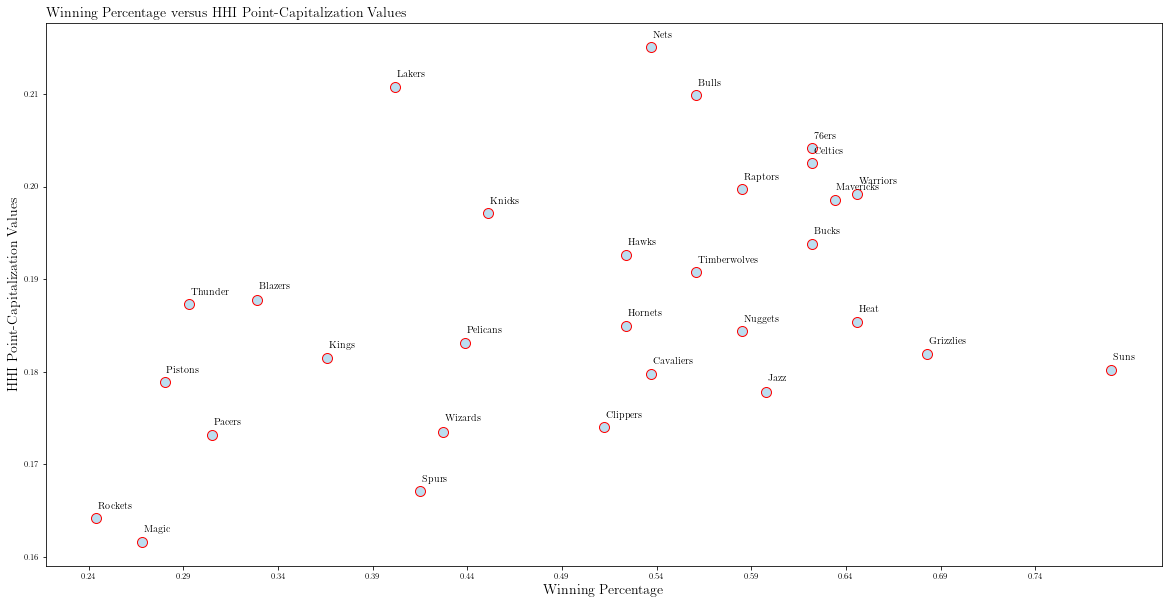

In [74]:
#-- Plotting HHI for PCS versus Winning Percentage --# 

plt.figure(figsize = (20, 10))

#-- scatter plot --# 
plt.scatter(x = wdata3['W_PCT'], 
            y = wdata3['HHI_PCS'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['W_PCT'][i] + .001,
             y = wdata3['HHI_PCS'][i] + .001,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 10})

plt.xlabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.xticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.ylabel('HHI Point-Capitalization Values', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['HHI_PCS']), np.max(wdata3['HHI_PCS']), .01), 2) )

plt.title('Winning Percentage versus HHI Point-Capitalization Values', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

#plt.savefig('HHIPCS_WPCT.pdf', format = 'pdf', dpi = 400)
plt.show()

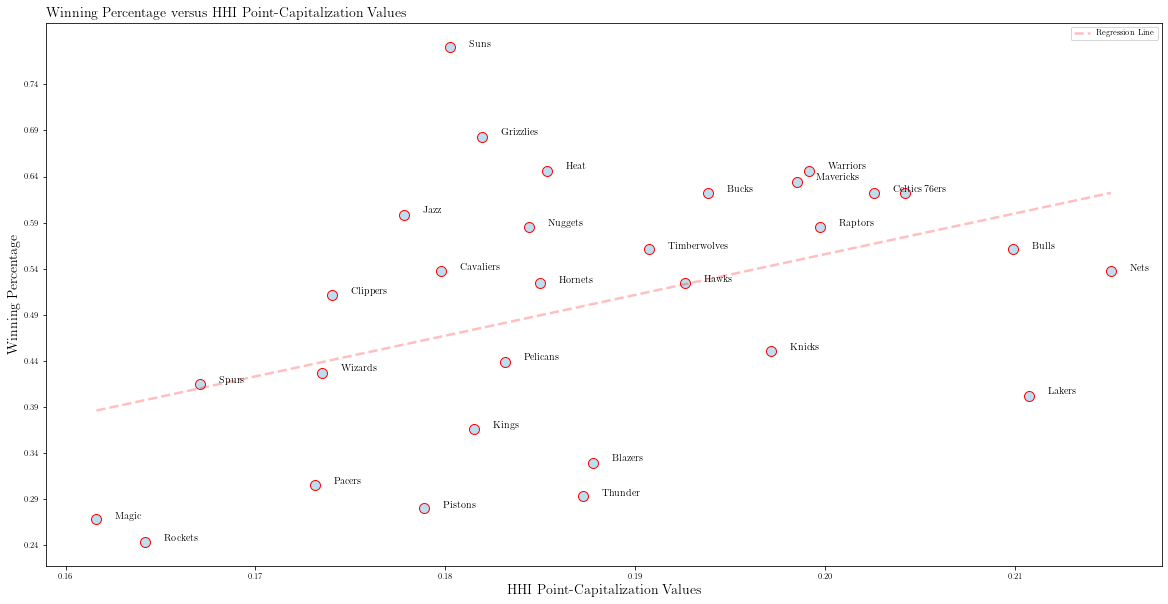

In [84]:
#-- Plotting HHI for PCS versus Winning Percentage --# 

plt.figure(figsize = (20, 10))

#-- scatter plot --# 
plt.scatter(x = wdata3['HHI_PCS'], 
            y = wdata3['W_PCT'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['HHI_PCS'][i] + .001,
             y = wdata3['W_PCT'][i] + .001,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 10})
    

#-- regression line --#

b, a = np.polyfit(x = wdata3['HHI_PCS'], y = wdata3['W_PCT'], deg = 1)
regression_x = np.linspace(np.min(wdata3['HHI_PCS']), np.max(wdata3['HHI_PCS']), 100)
regression_y = a + b * regression_x

plt.plot(regression_x
         , regression_y
         , color = 'red'
         , linestyle = '--'
         , linewidth = 2.5
         , alpha = .25
         , label = 'Regression Line')

plt.ylabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.xlabel('HHI Point-Capitalization Values', fontdict = {'family' : 'serif', 'size' : 14})
plt.xticks(np.round( np.arange(np.min(wdata3['HHI_PCS']), np.max(wdata3['HHI_PCS']), .01), 2) )

plt.legend()

plt.title('Winning Percentage versus HHI Point-Capitalization Values', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('HHIPCS_WPCT.pdf', format = 'pdf', dpi = 400)
plt.show()

#### No Latex - HHI C vs WPCT

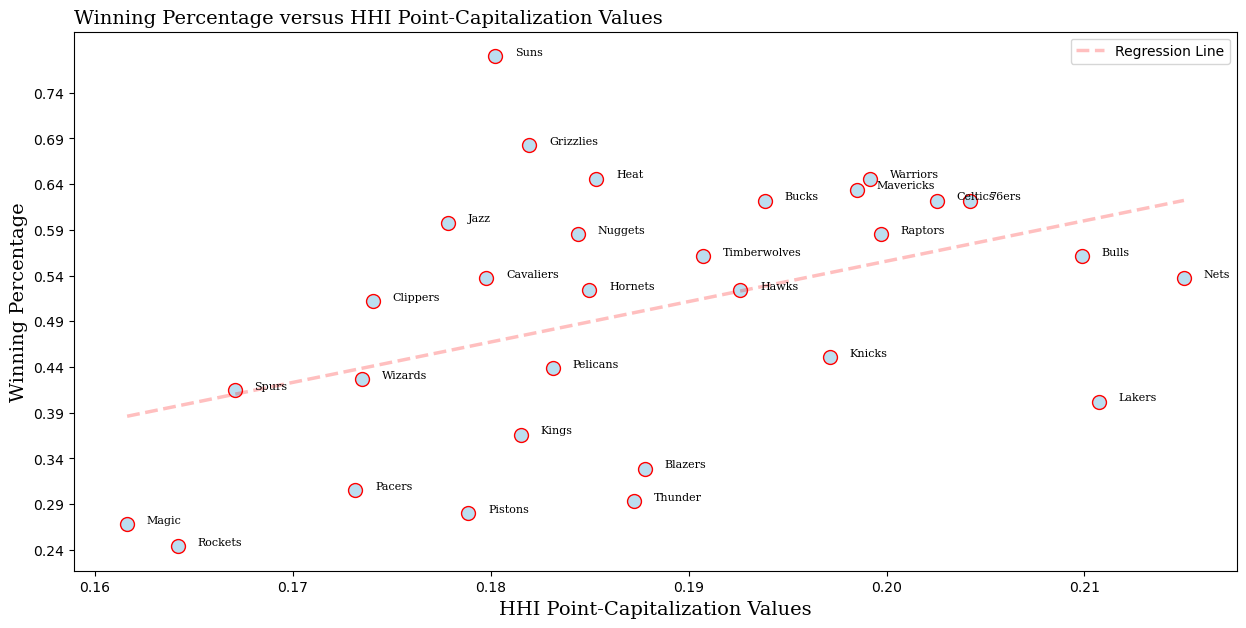

In [111]:
#-- HHI Point-Capitalization Values versus Winning Percentage NO LATEX PARAMETERS --# 

plt.rcdefaults()
plt.figure(figsize = (15, 7))

#-- scatter plot --# 
plt.scatter(x = wdata3['HHI_PCS'], 
            y = wdata3['W_PCT'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['HHI_PCS'][i] + .001,
             y = wdata3['W_PCT'][i] + .001,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 8})
    

#-- regression line --#

b, a = np.polyfit(x = wdata3['HHI_PCS'], y = wdata3['W_PCT'], deg = 1)
regression_x = np.linspace(np.min(wdata3['HHI_PCS']), np.max(wdata3['HHI_PCS']), 100)
regression_y = a + b * regression_x

plt.plot(regression_x
         , regression_y
         , color = 'red'
         , linestyle = '--'
         , linewidth = 2.5
         , alpha = .25
         , label = 'Regression Line')

plt.ylabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.xlabel('HHI Point-Capitalization Values', fontdict = {'family' : 'serif', 'size' : 14})
plt.xticks(np.round( np.arange(np.min(wdata3['HHI_PCS']), np.max(wdata3['HHI_PCS']), .01), 2) )

plt.legend()

plt.title('Winning Percentage versus HHI Point-Capitalization Values', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('HHIPCS_WPCT.pdf', format = 'pdf', dpi = 400)
plt.show()

#### No Latex - HHI P vs WPCT

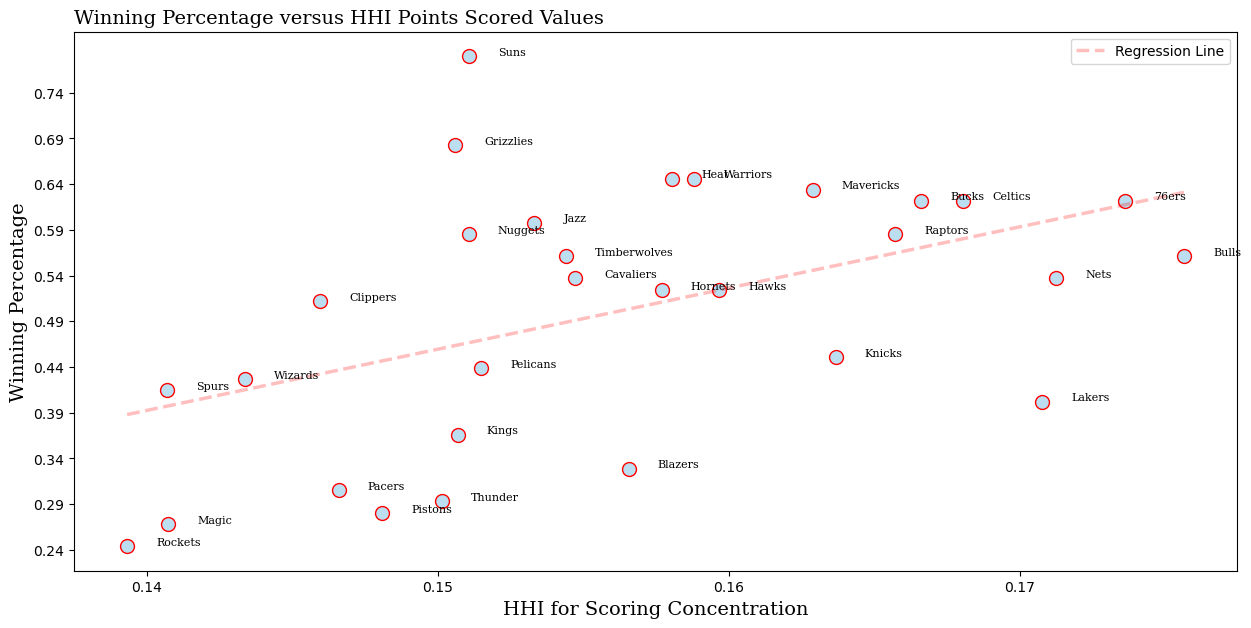

In [112]:
#-- HHI Points Values versus Winning Percentage NO LATEX PARAMETERS --# 

plt.rcdefaults()
plt.figure(figsize = (15, 7))

#-- scatter plot --# 
plt.scatter(x = wdata3['HHI_PS'], 
            y = wdata3['W_PCT'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['HHI_PS'][i] + .001,
             y = wdata3['W_PCT'][i] + .001,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 8})
    

#-- regression line --#

b, a = np.polyfit(x = wdata3['HHI_PS'], y = wdata3['W_PCT'], deg = 1)
regression_x = np.linspace(np.min(wdata3['HHI_PS']), np.max(wdata3['HHI_PS']), 100)
regression_y = a + b * regression_x

plt.plot(regression_x
         , regression_y
         , color = 'red'
         , linestyle = '--'
         , linewidth = 2.5
         , alpha = .25
         , label = 'Regression Line')

plt.ylabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.xlabel('HHI for Scoring Concentration', fontdict = {'family' : 'serif', 'size' : 14})
plt.xticks(np.round( np.arange(np.min(wdata3['HHI_PS']), np.max(wdata3['HHI_PS']), .01), 2) )

plt.legend()

plt.title('Winning Percentage versus HHI Points Scored Values', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('HHIPS_WPCT.pdf', format = 'pdf', dpi = 400)
plt.show()

#### No Latex - HHI M vs WPCT

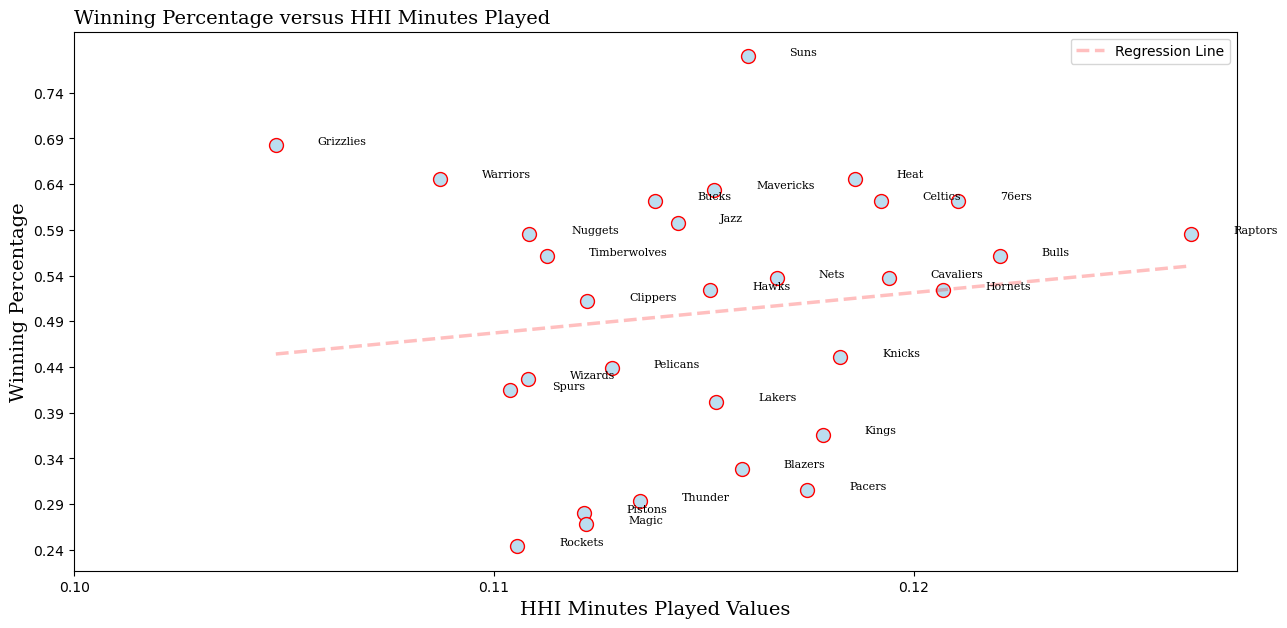

In [113]:
#-- HHI Point-Capitalization Values versus Winning Percentage NO LATEX PARAMETERS --# 

plt.rcdefaults()
plt.figure(figsize = (15, 7))

#-- scatter plot --# 
plt.scatter(x = wdata3['HHI_TS'], 
            y = wdata3['W_PCT'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['HHI_TS'][i] + .001,
             y = wdata3['W_PCT'][i] + .001,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 8})
    

#-- regression line --#

b, a = np.polyfit(x = wdata3['HHI_TS'], y = wdata3['W_PCT'], deg = 1)
regression_x = np.linspace(np.min(wdata3['HHI_TS']), np.max(wdata3['HHI_TS']), 100)
regression_y = a + b * regression_x

plt.plot(regression_x
         , regression_y
         , color = 'red'
         , linestyle = '--'
         , linewidth = 2.5
         , alpha = .25
         , label = 'Regression Line')

plt.ylabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.xlabel('HHI Minutes Played Values', fontdict = {'family' : 'serif', 'size' : 14})
plt.xticks(np.round( np.arange(np.min(wdata3['HHI_TS']), np.max(wdata3['HHI_TS']), .01), 2) )

plt.legend()

plt.title('Winning Percentage versus HHI Minutes Played', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('HHITS_WPCT.png', format = 'png', dpi = 400)
plt.show()

#### Latex - HHI M vs WPCT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


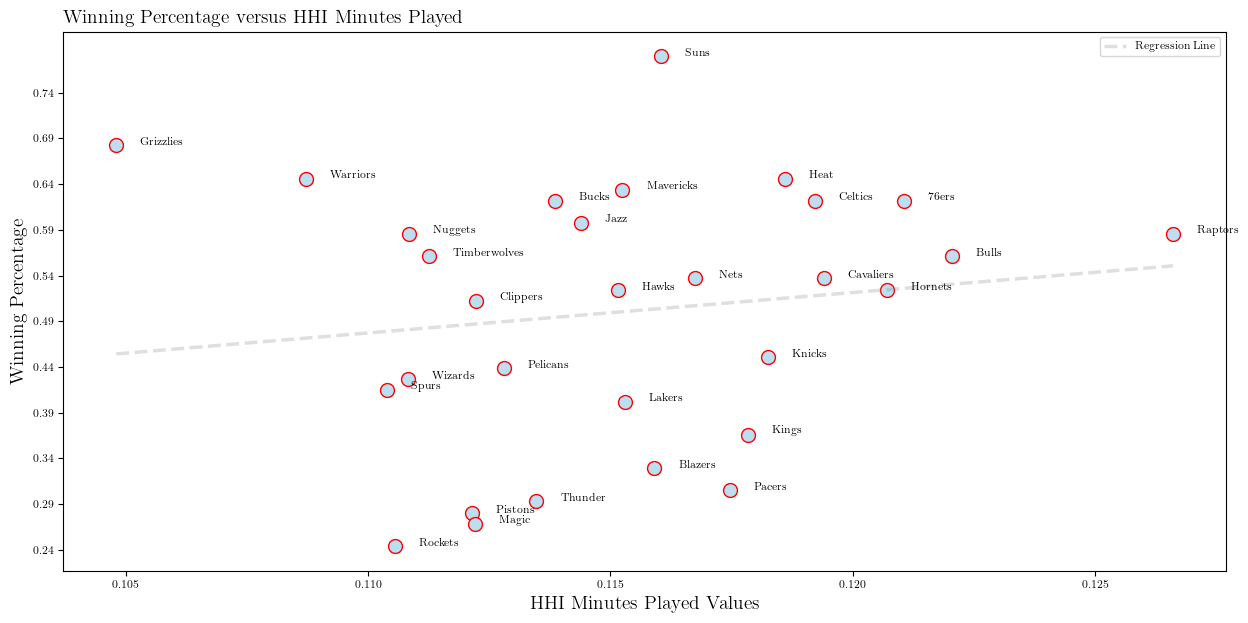

In [125]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)


plt.figure(figsize = (15, 7))

#-- scatter plot --# 
plt.scatter(x = wdata3['HHI_TS'], 
            y = wdata3['W_PCT'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['HHI_TS'][i] + .0005,
             y = wdata3['W_PCT'][i] + .0005,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 8})
    

#-- regression line --#

b, a = np.polyfit(x = wdata3['HHI_TS'], y = wdata3['W_PCT'], deg = 1)
regression_x = np.linspace(np.min(wdata3['HHI_TS']), np.max(wdata3['HHI_TS']), 100)
regression_y = a + b * regression_x

plt.plot(regression_x
         , regression_y
         , color = 'grey'
         , linestyle = '--'
         , linewidth = 2.5
         , alpha = .25
         , label = 'Regression Line')

plt.ylabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.xlabel('HHI Minutes Played Values', fontdict = {'family' : 'serif', 'size' : 14})
#plt.xticks(np.round( np.arange(np.min(wdata3['HHI_TS']), np.max(wdata3['HHI_TS']), .0025), 2)
#           , labels = np.round( np.arange(np.min(wdata3['HHI_TS']), np.max(wdata3['HHI_TS']), .0025), 2) 
#)

plt.legend()

plt.title('Winning Percentage versus HHI Minutes Played', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('HHITS_WPCT.eps', format = 'eps', dpi = 400)
plt.show()


#### Latex - HHI P vs WPCT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


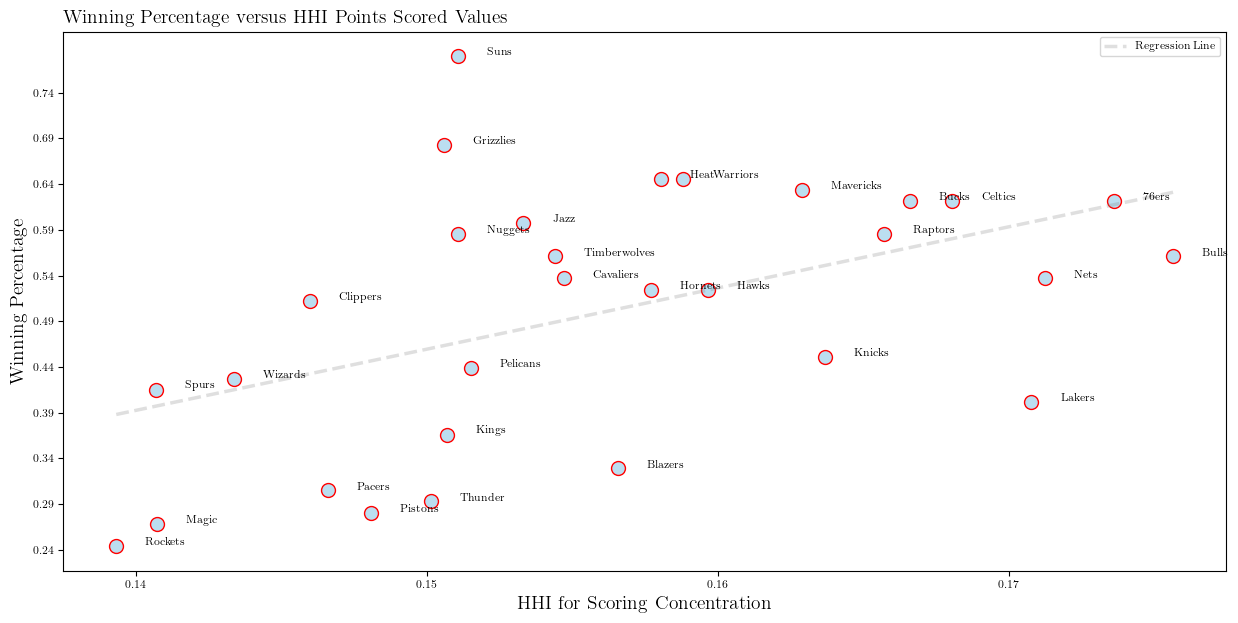

In [127]:
plt.figure(figsize = (15, 7))

#-- scatter plot --# 
plt.scatter(x = wdata3['HHI_PS'], 
            y = wdata3['W_PCT'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['HHI_PS'][i] + .001,
             y = wdata3['W_PCT'][i] + .001,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 8})
    

#-- regression line --#

b, a = np.polyfit(x = wdata3['HHI_PS'], y = wdata3['W_PCT'], deg = 1)
regression_x = np.linspace(np.min(wdata3['HHI_PS']), np.max(wdata3['HHI_PS']), 100)
regression_y = a + b * regression_x

plt.plot(regression_x
         , regression_y
         , color = 'grey'
         , linestyle = '--'
         , linewidth = 2.5
         , alpha = .25
         , label = 'Regression Line')

plt.ylabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.xlabel('HHI for Scoring Concentration', fontdict = {'family' : 'serif', 'size' : 14})
plt.xticks(np.round( np.arange(np.min(wdata3['HHI_PS']), np.max(wdata3['HHI_PS']), .01), 2) )

plt.legend()

plt.title('Winning Percentage versus HHI Points Scored Values', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('HHIPS_WPCT.eps', format = 'eps', dpi = 400)
plt.show()

#### Latex - HHI C vs WPCT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


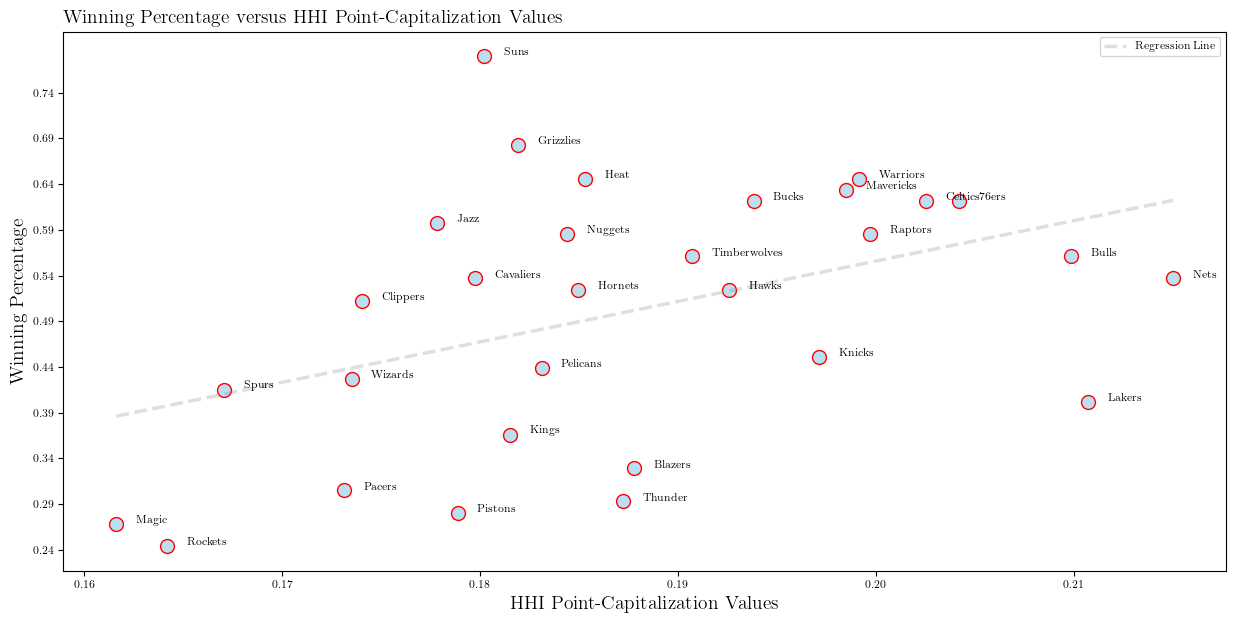

In [126]:
plt.figure(figsize = (15, 7))

#-- scatter plot --# 
plt.scatter(x = wdata3['HHI_PCS'], 
            y = wdata3['W_PCT'], 
            c = '#BBDEF0',
            edgecolors = 'red', 
            s = 100)


#-- plot labels --# 
for i in range(wdata3.shape[0]):
    plt.text(x = wdata3['HHI_PCS'][i] + .001,
             y = wdata3['W_PCT'][i] + .001,
             s = wdata3['TEAM_ABBRV'][i],
             fontdict = {'family' : 'serif', 'size' : 8})
    

#-- regression line --#

b, a = np.polyfit(x = wdata3['HHI_PCS'], y = wdata3['W_PCT'], deg = 1)
regression_x = np.linspace(np.min(wdata3['HHI_PCS']), np.max(wdata3['HHI_PCS']), 100)
regression_y = a + b * regression_x

plt.plot(regression_x
         , regression_y
         , color = 'grey'
         , linestyle = '--'
         , linewidth = 2.5
         , alpha = .25
         , label = 'Regression Line')

plt.ylabel('Winning Percentage', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(wdata3['W_PCT']), np.max(wdata3['W_PCT']), .05), 2) )

plt.xlabel('HHI Point-Capitalization Values', fontdict = {'family' : 'serif', 'size' : 14})
plt.xticks(np.round( np.arange(np.min(wdata3['HHI_PCS']), np.max(wdata3['HHI_PCS']), .01), 2) )

plt.legend()

plt.title('Winning Percentage versus HHI Point-Capitalization Values', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('HHIPCS_WPCT.eps', format = 'eps', dpi = 400)
plt.show()

### Section 4 - Regression Analysis

#### Section 4.2 Univariate Linear Regression

In [99]:
#-- Regression and Multivariate Regression of Index Values to Winning Percentage --#

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#-- Regression of HHI Minute Index to Winning Percentage --#
x_TS = wdata3['HHI_TS'].values.reshape(-1, 1)
y_TS = wdata3['W_PCT'].values.reshape(-1, 1)

regression_TS = LinearRegression()
regression_TS.fit(x_TS, y_TS)

TS_Beta = regression_TS.coef_[0][0]
TS_Alpha = regression_TS.intercept_[0]

#-- Regression of HHI Points Index to Winning Percentage --#
x_PS = wdata3['HHI_PS'].values.reshape(-1, 1)
y_PS = wdata3['W_PCT'].values.reshape(-1, 1)

regression_PS = LinearRegression()
regression_PS.fit(x_PS, y_PS)

PS_Beta = regression_PS.coef_[0][0]
PS_Alpha = regression_PS.intercept_[0]

#-- Regression of HHI Point Capitalization Index to Winning Percentage --#
x_PCS = wdata3['HHI_PCS'].values.reshape(-1,1)
y_PCS = wdata3['W_PCT'].values.reshape(-1,1)

regression_PCS = LinearRegression()
regression_PCS.fit(x_PCS, y_PCS)

PCS_Beta = regression_PCS.coef_[0][0]
PCS_Alpha = regression_PCS.intercept_[0]


#-- Combine Results into a Dataframe --#

regression_results = pd.DataFrame({'Index' : ['TS', 'PS', 'PCS']
                                   , 'Alpha' : [TS_Alpha, PS_Alpha, PCS_Alpha]
                                   , 'Beta' : [TS_Beta, PS_Beta, PCS_Beta]})

regression_results

,Index,Alpha,Beta
0,TS,-0.009011,4.420519
1,PS,-0.544597,6.693922
2,PCS,-0.328323,4.420767


#### Section 4.3 Multivariate Linear Regression Analysis

In [109]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats

X = wdata3[['HHI_TS', 'HHI_PS', 'HHI_PCS']].values.reshape(-1,3)
y = wdata3['W_PCT'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))tt

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0        0.1524            0.608     0.251            NaN
1      -10.9680            7.214    -1.520            NaN
2       18.9795            9.388     2.022            NaN
3       -7.2124            6.203    -1.163            NaN


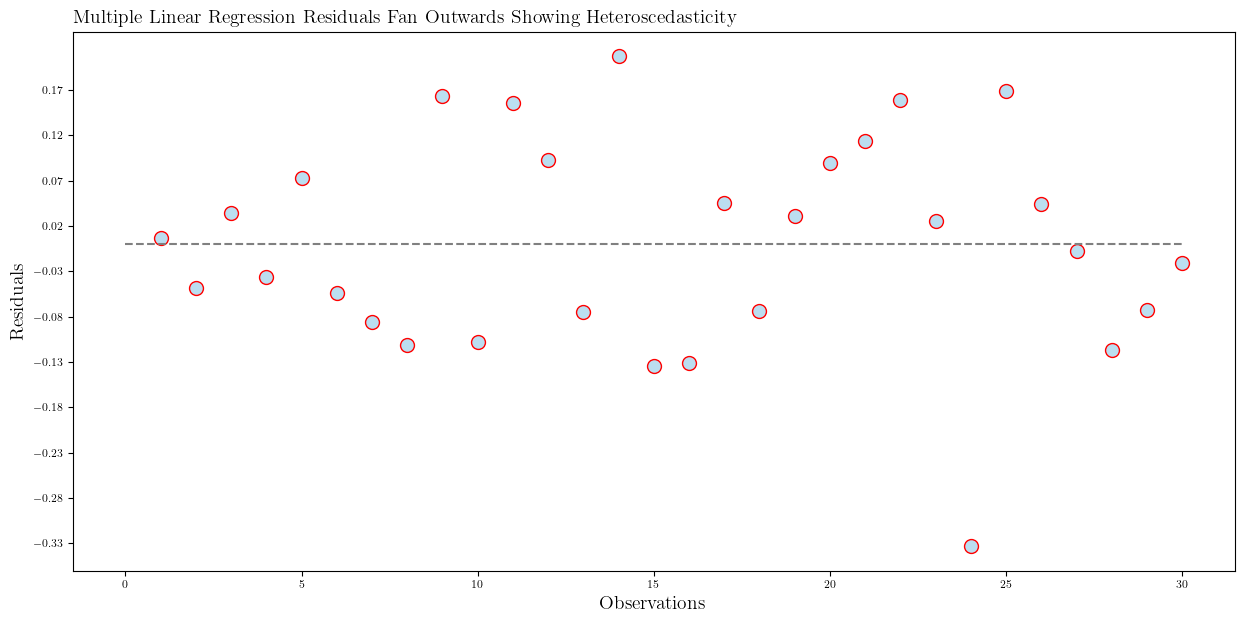

In [139]:
#-- Regression Residuals Plot --# 

residuals = predictions - y

plt.figure(figsize = (15, 7))
plt.scatter(x = np.arange(1, 31, 1)
            , y = residuals
            , c = '#BBDEF0'
            , edgecolors = 'red'
            , s = 100)

plt.hlines(y = 0, xmin = 0, xmax = 30, color = 'grey', linestyle = '--', linewidth = 1.5)

plt.ylabel('Residuals', fontdict = {'family' : 'serif', 'size' : 14})
plt.yticks(np.round( np.arange(np.min(residuals), np.max(residuals), .05), 2) )

plt.xlabel('Observations', fontdict = {'family' : 'serif', 'size' : 14})

plt.title('Multiple Linear Regression Residuals Fan Outwards Showing Heteroscedasticity', loc = 'left', fontdict = {'family' : 'serif', 'size' : 14})

plt.savefig('MLR_Residuals.eps', format = 'eps', dpi = 400)

plt.show()